In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data
spam_data = pd.read_csv('spambase_new.csv')

In [3]:
# Split the dataset into the feature matrix (X) and the target variable (y)
X = spam_data.drop('spam, non-spam classes', axis=1)
y = spam_data['spam, non-spam classes']

In [4]:
# Split the dataset into training and testing sets with a 9:1 ratio
#Set the random state equals to 0 because every time I run the code same split is generated.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
#Centering and Feature Scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**PCA**

In [6]:
#Perform PCA
#Retain 95% of information from the datset
pca = PCA(0.95)
X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)

In [7]:
pca.n_components_

49

In [8]:
X_train_pca.shape

(3789, 49)

In [9]:
y_train.shape

(3789,)

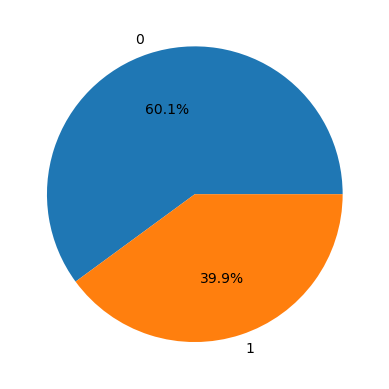

In [10]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.show()

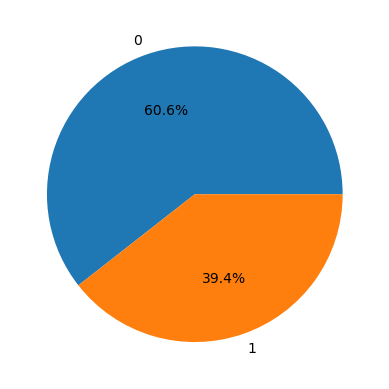

In [11]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.show()

**Scree Plot**

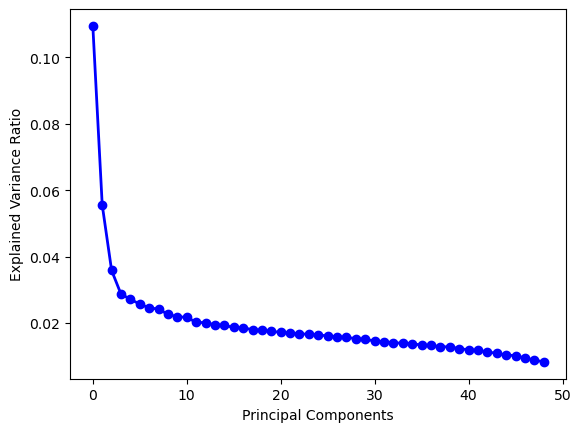

In [12]:
plt.plot((np.arange(pca.n_components_)), pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

**Variance Explanation Plot**

In [13]:
pca.explained_variance_ratio_

array([0.10947535, 0.05556683, 0.0358294 , 0.02868966, 0.0271688 ,
       0.02565881, 0.02458213, 0.02417705, 0.02260543, 0.02188607,
       0.02170827, 0.02020813, 0.02009365, 0.01945683, 0.01930077,
       0.01865183, 0.01856672, 0.01796751, 0.01781822, 0.01747541,
       0.01719437, 0.01700054, 0.01672558, 0.01662851, 0.01640093,
       0.0161104 , 0.01588092, 0.01563824, 0.01531056, 0.01508866,
       0.01457023, 0.01441327, 0.01402119, 0.01393563, 0.01380936,
       0.01330648, 0.0132294 , 0.01288336, 0.01278352, 0.01230873,
       0.01191089, 0.01175584, 0.01131623, 0.01083869, 0.01037527,
       0.01015452, 0.00944801, 0.00884303, 0.00827368])

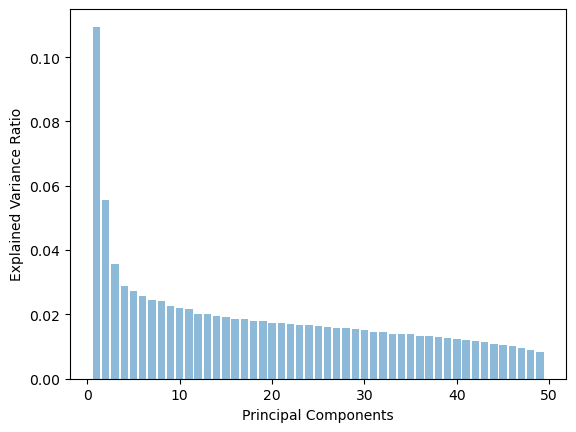

In [14]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

**Cumulative Variance Plot**

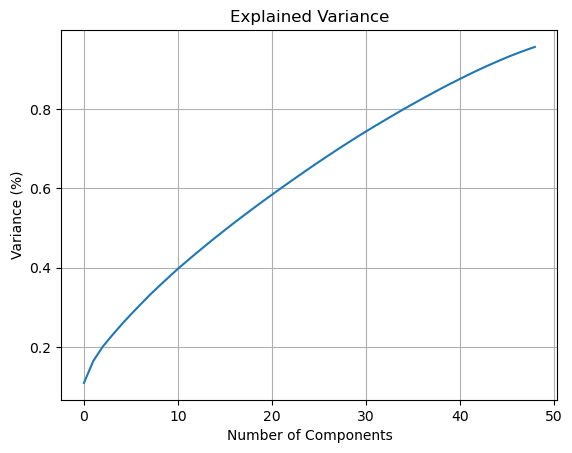

In [15]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

**Scatter Plot of PC1 and PC2**

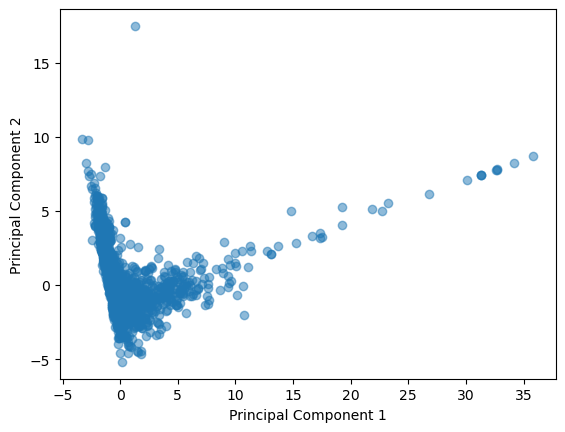

In [16]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# K-Nearest Neighbor(KNN) Classification Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
classifier = KNeighborsClassifier()

### Optimal K value

**For non PCA data**

In [19]:
#Grid Search
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for k values to search
param_grid = {'n_neighbors': range(1, 30)}

#Perform grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", grid_search.best_params_['n_neighbors'])
print("Best accuracy score: ", grid_search.best_score_)

Optimal k value:  3
Best accuracy score:  0.7878038919077179


In [20]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  3
Best accuracy score:  0.7878038919077179


**For PCA data**

In [21]:
#Grid Search
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for k values to search
param_grid = {'n_neighbors': range(1, 30)}

#Perform grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", grid_search.best_params_['n_neighbors'])
print("Best accuracy score: ", grid_search.best_score_)

Optimal k value:  5
Best accuracy score:  0.8981275901611345


In [22]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  7
Best accuracy score:  0.8962813215616429


In [23]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  5
Best accuracy score:  0.8981275901611345


### Model Training and Evaluation

#### Non PCA data

**K value: 5, Distance metrics: Minkowski distance**

In [14]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

[1 0 1 1 1]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.8614410134600158
--------------------------------------------------------------
Accuracy on testing data:  0.7980997624703088
--------------------------------------------------------------
Confusion Matrix: 

[[204  51]
 [ 34 132]]
--------------------------------------------------------------
Confusion Matrix: 


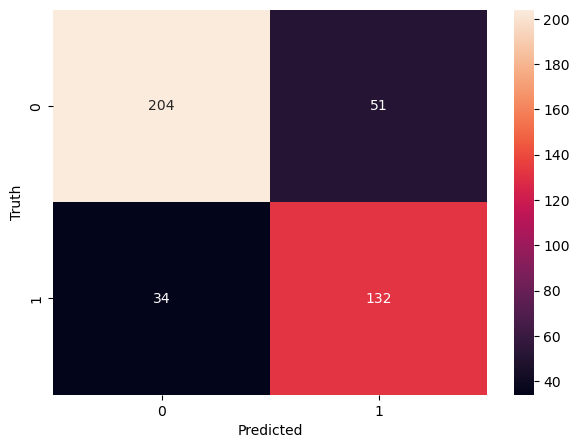

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       255
           1       0.72      0.80      0.76       166

    accuracy                           0.80       421
   macro avg       0.79      0.80      0.79       421
weighted avg       0.80      0.80      0.80       421

--------------------------------------------------------------


In [15]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 3, Distance metrics: Minkowski distance**

In [16]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

[1 0 1 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.8928477170757456
--------------------------------------------------------------
Accuracy on testing data:  0.8052256532066508
--------------------------------------------------------------
Confusion Matrix: 

[[209  46]
 [ 36 130]]
--------------------------------------------------------------
Confusion Matrix: 


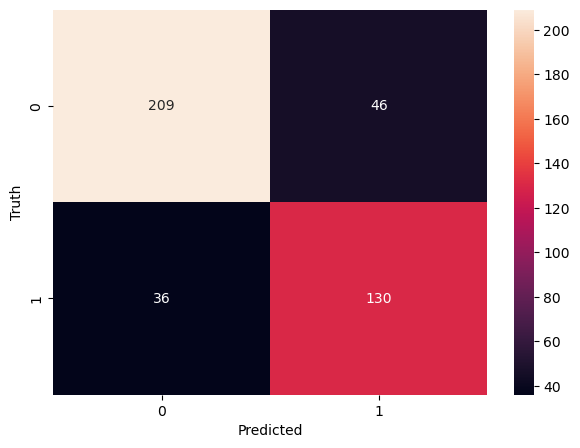

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       255
           1       0.74      0.78      0.76       166

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421

--------------------------------------------------------------


In [17]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 7, Distance metrics: Minkowski distance**

In [18]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

[1 0 0 1 1]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.84217471628398
--------------------------------------------------------------
Accuracy on testing data:  0.7933491686460807
--------------------------------------------------------------
Confusion Matrix: 

[[205  50]
 [ 37 129]]
--------------------------------------------------------------
Confusion Matrix: 


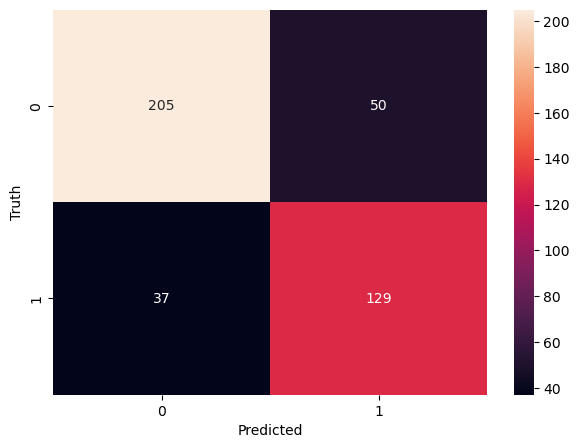

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       255
           1       0.72      0.78      0.75       166

    accuracy                           0.79       421
   macro avg       0.78      0.79      0.79       421
weighted avg       0.80      0.79      0.79       421

--------------------------------------------------------------


In [19]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 5, Distance metrics: Euclidean distance**

In [20]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

[1 0 1 1 1]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.8614410134600158
--------------------------------------------------------------
Accuracy on testing data:  0.7980997624703088
--------------------------------------------------------------
Confusion Matrix: 

[[204  51]
 [ 34 132]]
--------------------------------------------------------------
Confusion Matrix: 


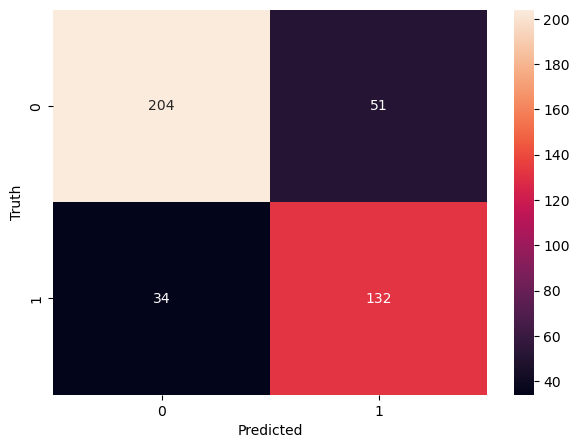

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       255
           1       0.72      0.80      0.76       166

    accuracy                           0.80       421
   macro avg       0.79      0.80      0.79       421
weighted avg       0.80      0.80      0.80       421

--------------------------------------------------------------


In [21]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 3, Distance metrics: Euclidean distance**

In [22]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

[1 0 1 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.8928477170757456
--------------------------------------------------------------
Accuracy on testing data:  0.8052256532066508
--------------------------------------------------------------
Confusion Matrix: 

[[209  46]
 [ 36 130]]
--------------------------------------------------------------
Confusion Matrix: 


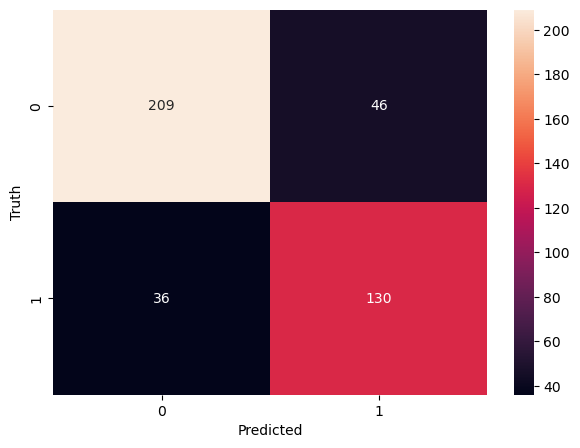

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       255
           1       0.74      0.78      0.76       166

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421

--------------------------------------------------------------


In [23]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 7, Distance metrics: Euclidean distance**

In [24]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

[1 0 0 1 1]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.84217471628398
--------------------------------------------------------------
Accuracy on testing data:  0.7933491686460807
--------------------------------------------------------------
Confusion Matrix: 

[[205  50]
 [ 37 129]]
--------------------------------------------------------------
Confusion Matrix: 


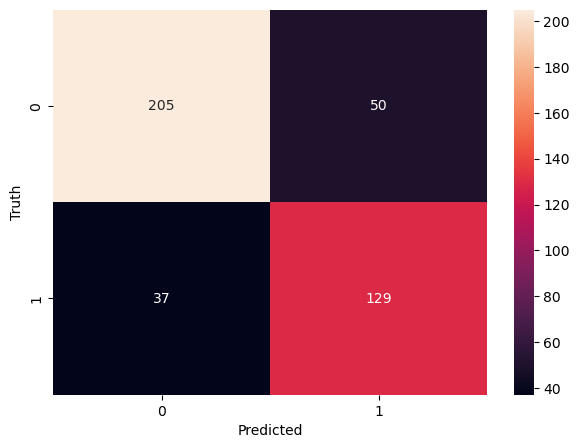

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       255
           1       0.72      0.78      0.75       166

    accuracy                           0.79       421
   macro avg       0.78      0.79      0.79       421
weighted avg       0.80      0.79      0.79       421

--------------------------------------------------------------


In [25]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 5, Distance metrics: Manhattan distance**

In [26]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

[1 0 0 1 1]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.8883610451306413
--------------------------------------------------------------
Accuracy on testing data:  0.8432304038004751
--------------------------------------------------------------
Confusion Matrix: 

[[219  36]
 [ 30 136]]
--------------------------------------------------------------
Confusion Matrix: 


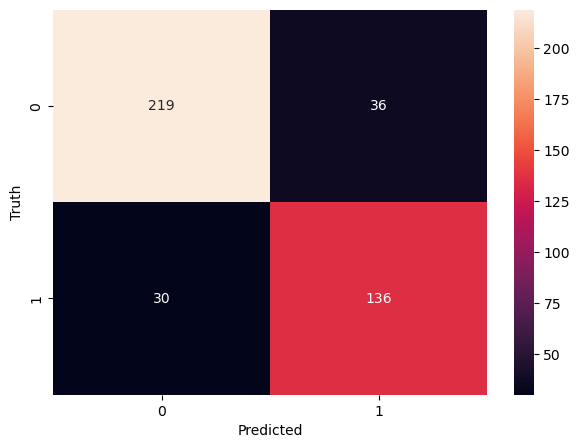

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.79      0.82      0.80       166

    accuracy                           0.84       421
   macro avg       0.84      0.84      0.84       421
weighted avg       0.84      0.84      0.84       421

--------------------------------------------------------------


In [27]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 3, Distance metrics: Manhattan distance**

In [28]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

[1 0 1 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9136975455265242
--------------------------------------------------------------
Accuracy on testing data:  0.850356294536817
--------------------------------------------------------------
Confusion Matrix: 

[[220  35]
 [ 28 138]]
--------------------------------------------------------------
Confusion Matrix: 


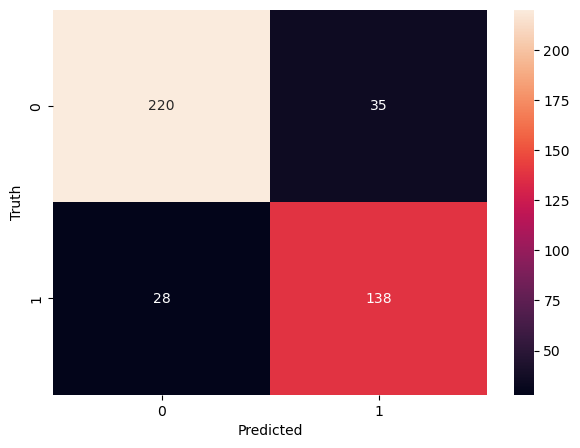

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       255
           1       0.80      0.83      0.81       166

    accuracy                           0.85       421
   macro avg       0.84      0.85      0.84       421
weighted avg       0.85      0.85      0.85       421

--------------------------------------------------------------


In [29]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 7, Distance metrics: Manhattan distance**

In [30]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

[1 0 0 1 1]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.8741092636579573
--------------------------------------------------------------
Accuracy on testing data:  0.838479809976247
--------------------------------------------------------------
Confusion Matrix: 

[[216  39]
 [ 29 137]]
--------------------------------------------------------------
Confusion Matrix: 


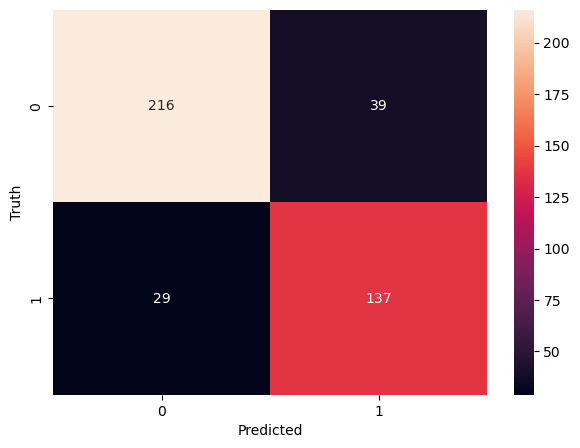

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       255
           1       0.78      0.83      0.80       166

    accuracy                           0.84       421
   macro avg       0.83      0.84      0.83       421
weighted avg       0.84      0.84      0.84       421

--------------------------------------------------------------


In [31]:
prediction_test = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

#### PCA data

**K value: 5, Distance metrics: Minkowski distance**

In [32]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier()

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9321720770651887
--------------------------------------------------------------
Accuracy on testing data:  0.9144893111638955
--------------------------------------------------------------
Confusion Matrix: 

[[239  16]
 [ 20 146]]
--------------------------------------------------------------
Confusion Matrix: 


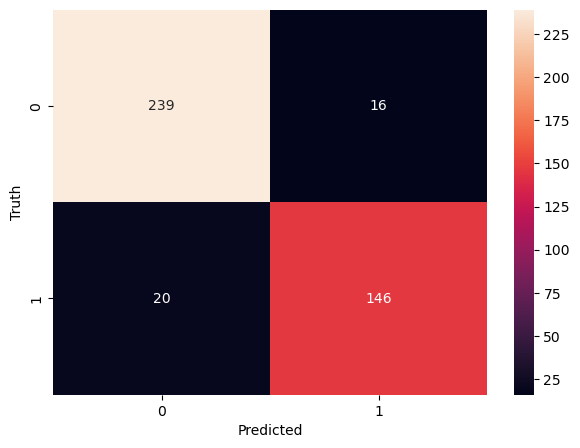

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.88      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [37]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 3, Distance metrics: Minkowski distance**

In [38]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

**K value: 7, Distance metrics: Minkowski distance**

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9435207178675112
--------------------------------------------------------------
Accuracy on testing data:  0.9097387173396675
--------------------------------------------------------------
Confusion Matrix: 

[[239  16]
 [ 22 144]]
--------------------------------------------------------------
Confusion Matrix: 


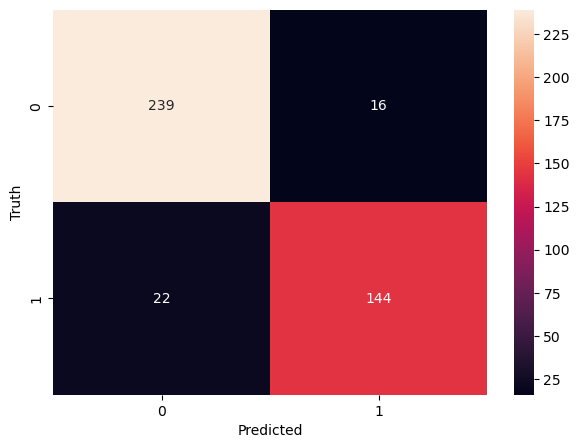

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.87      0.88       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.90       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [39]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

In [40]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=7)

**K value: 5, Distance metrics: Euclidean distance**

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9242544206914753
--------------------------------------------------------------
Accuracy on testing data:  0.9097387173396675
--------------------------------------------------------------
Confusion Matrix: 

[[239  16]
 [ 22 144]]
--------------------------------------------------------------
Confusion Matrix: 


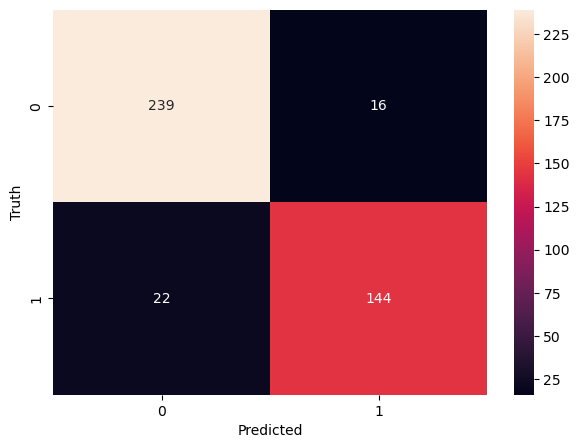

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.87      0.88       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.90       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [41]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

In [42]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(metric='euclidean')

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9321720770651887
--------------------------------------------------------------
Accuracy on testing data:  0.9144893111638955
--------------------------------------------------------------
Confusion Matrix: 

[[239  16]
 [ 20 146]]
--------------------------------------------------------------
Confusion Matrix: 


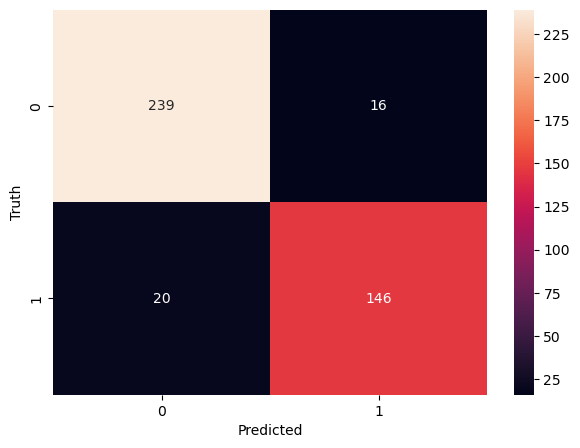

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.88      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [43]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 3, Distance metrics: Euclidean distance**

In [44]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9435207178675112
--------------------------------------------------------------
Accuracy on testing data:  0.9097387173396675
--------------------------------------------------------------
Confusion Matrix: 

[[239  16]
 [ 22 144]]
--------------------------------------------------------------
Confusion Matrix: 


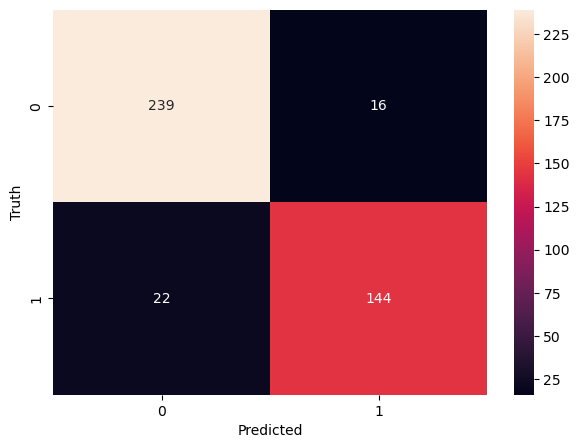

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.87      0.88       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.90       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [45]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 7, Distance metrics: Euclidean distance**

In [46]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9242544206914753
--------------------------------------------------------------
Accuracy on testing data:  0.9097387173396675
--------------------------------------------------------------
Confusion Matrix: 

[[239  16]
 [ 22 144]]
--------------------------------------------------------------
Confusion Matrix: 


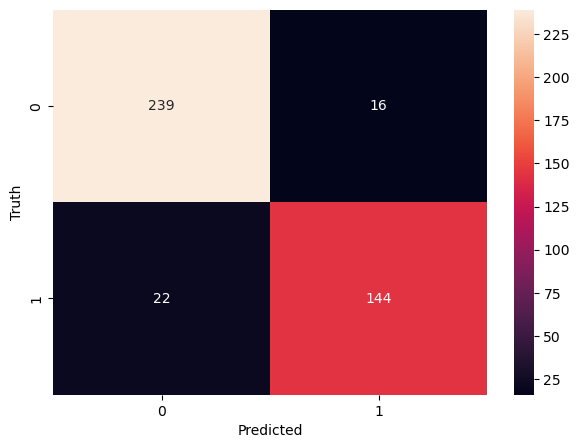

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.87      0.88       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.90       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [47]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 5, Distance metrics: Manhattan distance**

In [48]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(metric='manhattan')

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9284771707574558
--------------------------------------------------------------
Accuracy on testing data:  0.9121140142517815
--------------------------------------------------------------
Confusion Matrix: 

[[236  19]
 [ 18 148]]
--------------------------------------------------------------
Confusion Matrix: 


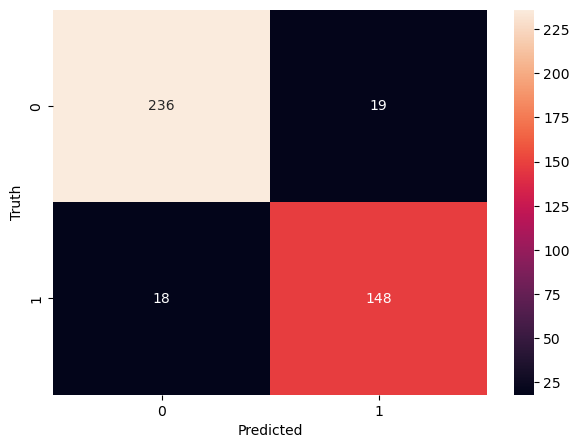

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       255
           1       0.89      0.89      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421

--------------------------------------------------------------


In [49]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 3, Distance metrics: Manhattan distance**

In [50]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9416732647136448
--------------------------------------------------------------
Accuracy on testing data:  0.8907363420427553
--------------------------------------------------------------
Confusion Matrix: 

[[232  23]
 [ 23 143]]
--------------------------------------------------------------
Confusion Matrix: 


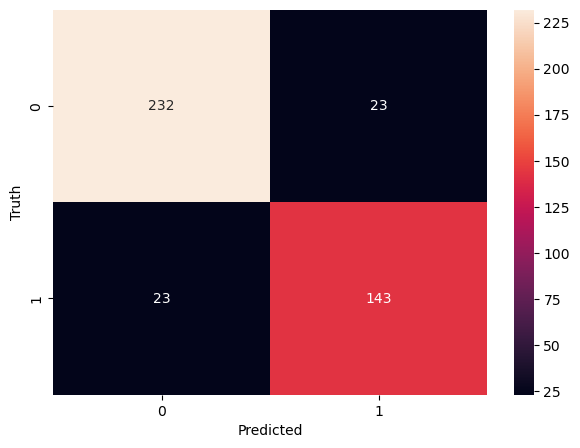

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.86      0.86      0.86       166

    accuracy                           0.89       421
   macro avg       0.89      0.89      0.89       421
weighted avg       0.89      0.89      0.89       421

--------------------------------------------------------------


In [51]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

**K value: 7, Distance metrics: Manhattan distance**

In [52]:
# Traning the model
classifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64
--------------------------------------------------------------
Accuracy on training data:  0.9213512800211138
--------------------------------------------------------------
Accuracy on testing data:  0.9026128266033254
--------------------------------------------------------------
Confusion Matrix: 

[[238  17]
 [ 24 142]]
--------------------------------------------------------------
Confusion Matrix: 


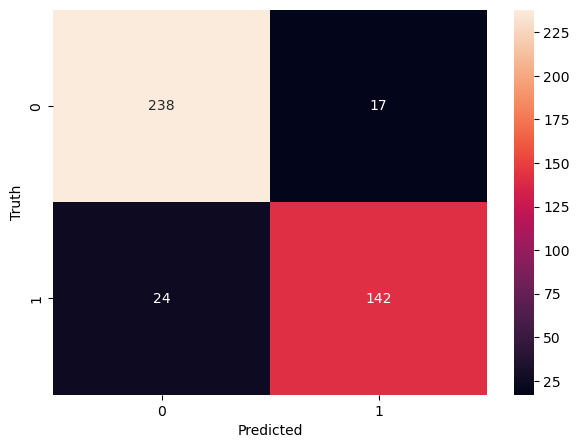

--------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       255
           1       0.89      0.86      0.87       166

    accuracy                           0.90       421
   macro avg       0.90      0.89      0.90       421
weighted avg       0.90      0.90      0.90       421

--------------------------------------------------------------


In [53]:
prediction_test = classifier.predict(X_test_pca)
prediction_train = classifier.predict(X_train_pca)

#Prediction on Testing data
print (prediction_test [0:5])
print (y_test [0:5])
print('--------------------------------------------------------------')

#Accuracy of training data
print('Accuracy on training data: ', accuracy_score(y_train,prediction_train))
print('--------------------------------------------------------------')

# Accuracy on testing data
print('Accuracy on testing data: ', classifier.score(X_test_pca,y_test))
print('--------------------------------------------------------------')

# Confusion Matrix
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print()
print(conf_matrix)
print('--------------------------------------------------------------')

# Plot the Confusion Matrix
print('Confusion Matrix: ')
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('--------------------------------------------------------------')

# Classification Report
print('Classification Report')
print()
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------')

# Decision Trees

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.model_selection import KFold

### Hyperparameter Tuning

**Non PCA data**

In [57]:
from sklearn.model_selection import GridSearchCV
# Create a decision tree object
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
parameters = {'max_depth': range(1, 21),
              'criterion': ['gini', 'entropy']}

# Create a grid search object using 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt, parameters, cv=cv, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 14}
Best accuracy: 0.9179245019614413


**PCA data**

In [58]:
# Create a decision tree object
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
parameters = {'max_depth': range(1, 21),
              'criterion': ['gini', 'entropy']}

# Create a grid search object using 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt, parameters, cv=cv, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9}
Best accuracy: 0.89627535564211


## Traning and Evaluate the Model

## Non PCA data

**Criterion: Entropy, Max Depth: 9**

In [14]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=9)
spam_email_tree

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [15]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

### Checking accuracy of testing dataset

In [16]:
from sklearn import tree

In [17]:
predTree = spam_email_tree.predict(X_test)

In [18]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [19]:
spam_email_tree.score(X_test,y_test)

0.9334916864608076

### Checking accuracy of training dataset

In [20]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.959356030614938

### Visualizing our final decision tree

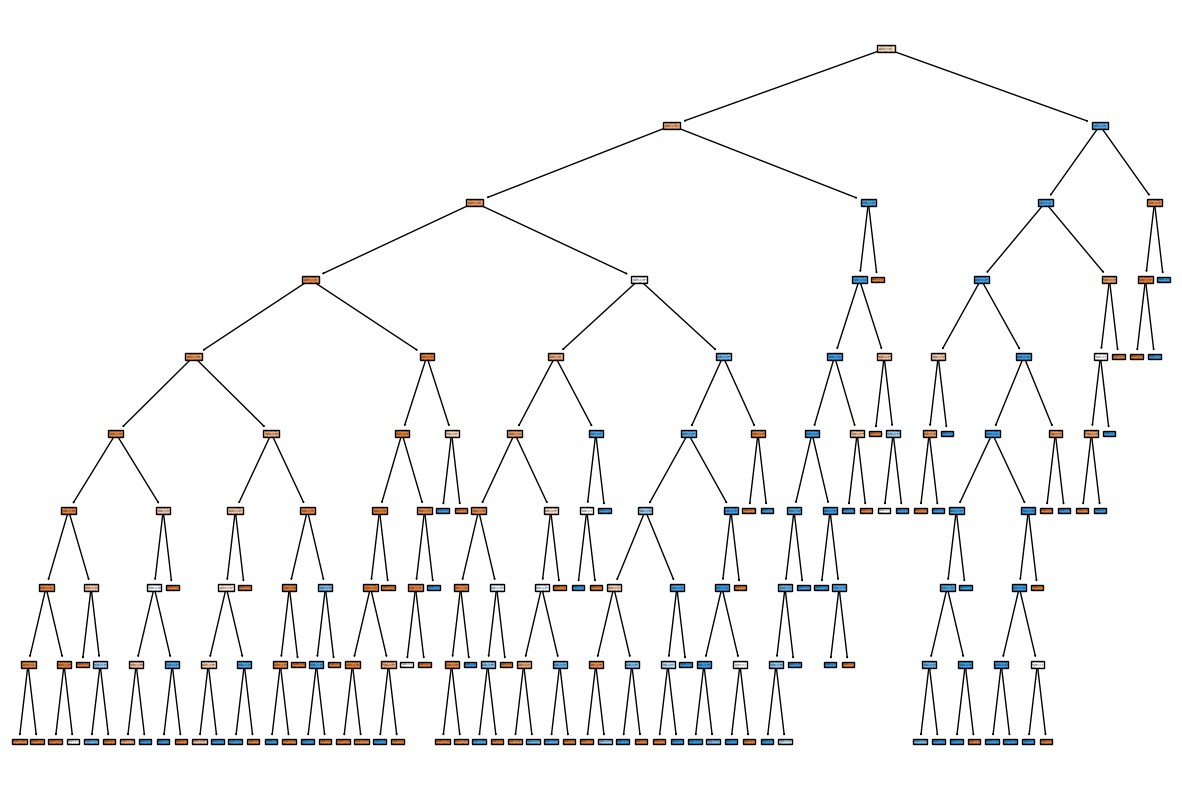

In [25]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [67]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[242,  13],
       [ 15, 151]])

Text(58.222222222222214, 0.5, 'Truth')

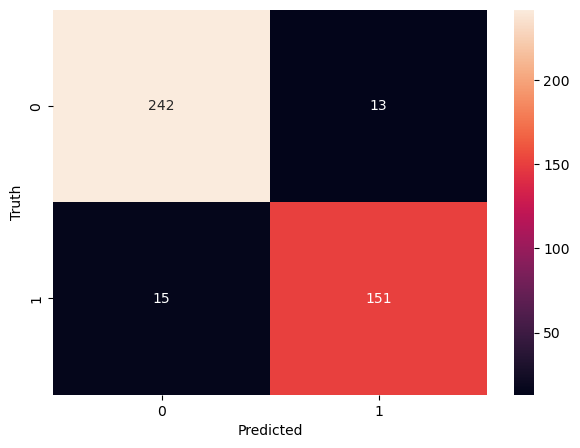

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [69]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       255
           1       0.92      0.91      0.92       166

    accuracy                           0.93       421
   macro avg       0.93      0.93      0.93       421
weighted avg       0.93      0.93      0.93       421



**Criterion: Entropy, Max Depth: 17**

In [70]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=17)
spam_email_tree

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=0)

In [71]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=0)

### Checking accuracy of testing dataset

In [72]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [73]:
predTree = spam_email_tree.predict(X_test)

In [74]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [75]:
spam_email_tree.score(X_test,y_test)

0.9216152019002375

### Checking accuracy of training dataset

In [76]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9854842966481921

### Visualizing our final decision tree

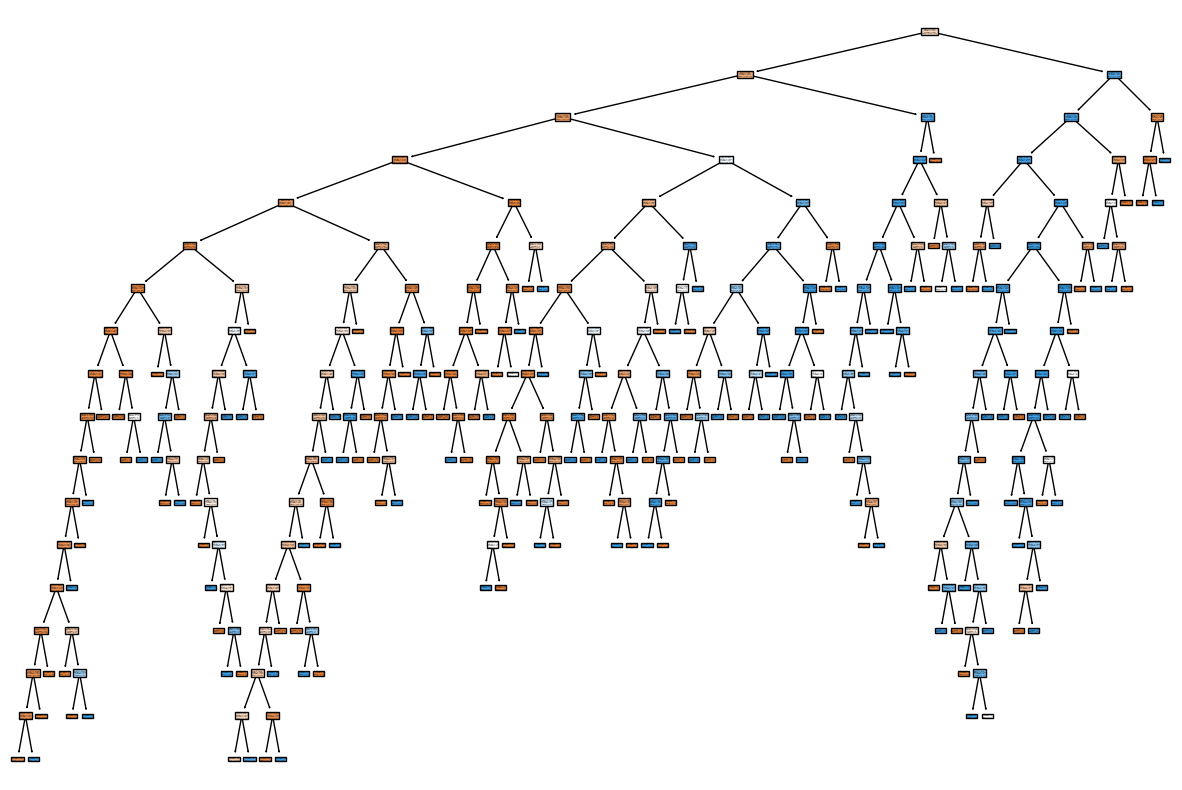

In [77]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [78]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[238,  17],
       [ 16, 150]])

Text(58.222222222222214, 0.5, 'Truth')

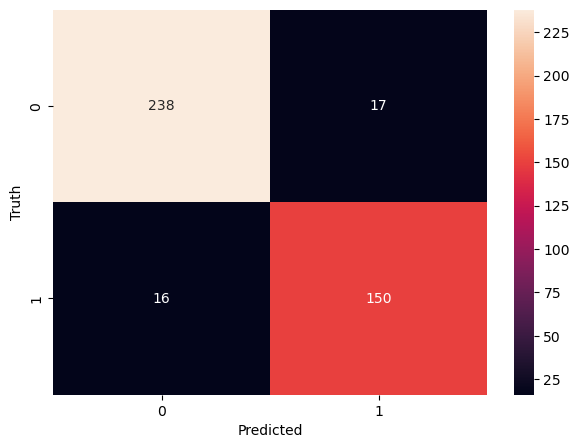

In [79]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [80]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       255
           1       0.90      0.90      0.90       166

    accuracy                           0.92       421
   macro avg       0.92      0.92      0.92       421
weighted avg       0.92      0.92      0.92       421



**Criterion: Entropy, Without Max Depth**

In [81]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='entropy')
spam_email_tree

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Checking accuracy of testing dataset

In [83]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [84]:
predTree = spam_email_tree.predict(X_test)

In [85]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [86]:
spam_email_tree.score(X_test,y_test)

0.9121140142517815

### Checking accuracy of training dataset

In [87]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9992082343626286

### Visualizing our final decision tree

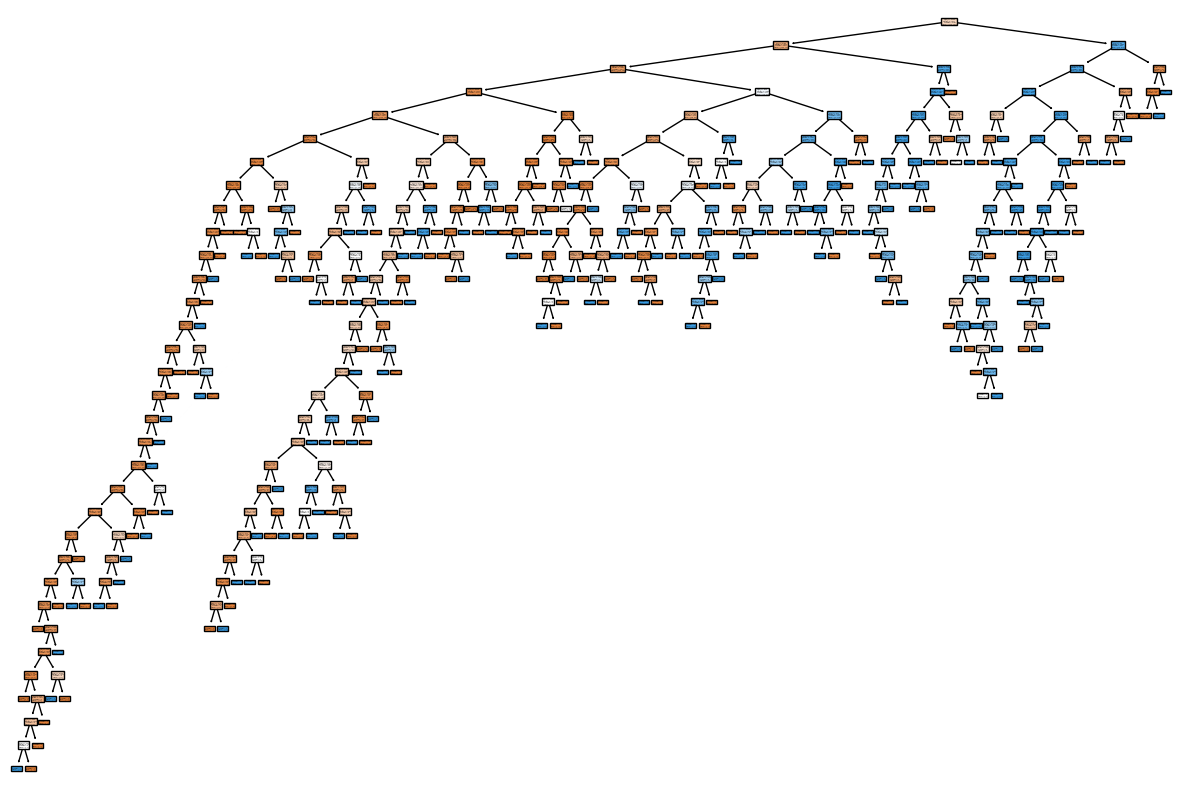

In [88]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [89]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[232,  23],
       [ 14, 152]])

Text(58.222222222222214, 0.5, 'Truth')

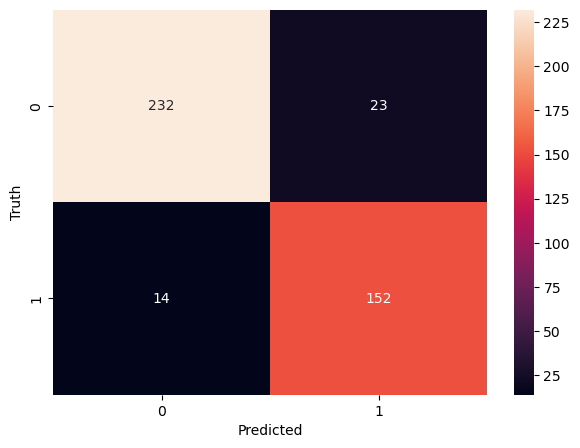

In [90]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [91]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       255
           1       0.87      0.92      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



**Criterion: Gini, Max Depth: 9**

In [92]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=9)
spam_email_tree

DecisionTreeClassifier(max_depth=9, random_state=0)

In [93]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

### Checking accuracy of testing dataset

In [94]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [95]:
predTree = spam_email_tree.predict(X_test)

In [96]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [97]:
spam_email_tree.score(X_test,y_test)

0.9239904988123515

### Checking accuracy of training dataset

In [98]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9564528899445764

### Visualizing our final decision tree

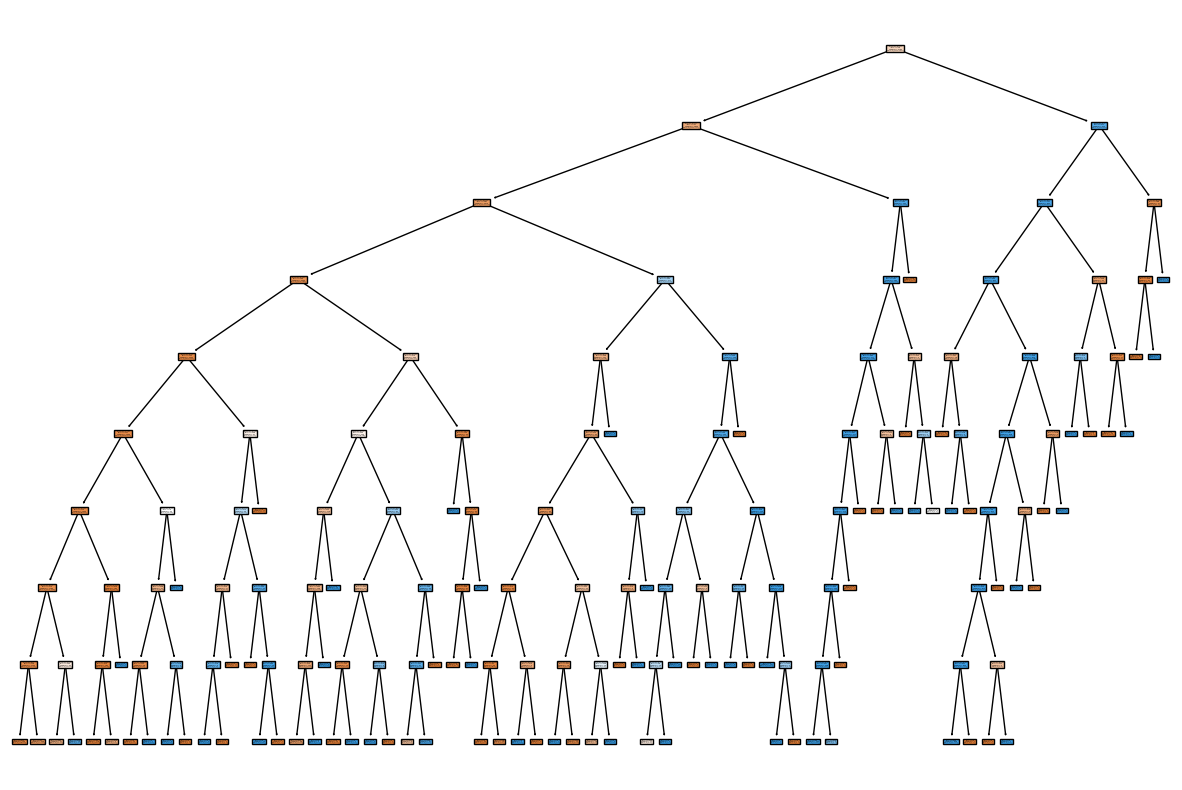

In [99]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [100]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[242,  13],
       [ 19, 147]])

Text(58.222222222222214, 0.5, 'Truth')

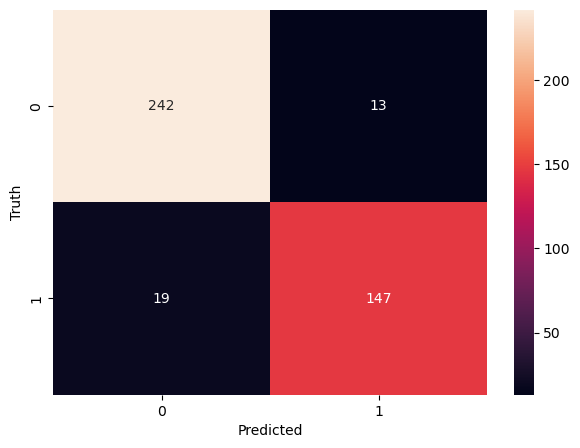

In [101]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [102]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       255
           1       0.92      0.89      0.90       166

    accuracy                           0.92       421
   macro avg       0.92      0.92      0.92       421
weighted avg       0.92      0.92      0.92       421



**Criterion: Gini, Max Depth: 17**

In [103]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=17)
spam_email_tree

DecisionTreeClassifier(max_depth=17, random_state=0)

In [104]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=17, random_state=0)

### Checking accuracy of testing dataset

In [105]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [106]:
predTree = spam_email_tree.predict(X_test)

In [107]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [108]:
spam_email_tree.score(X_test,y_test)

0.9216152019002375

### Checking accuracy of training dataset

In [109]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9875956716811823

### Visualizing our final decision tree

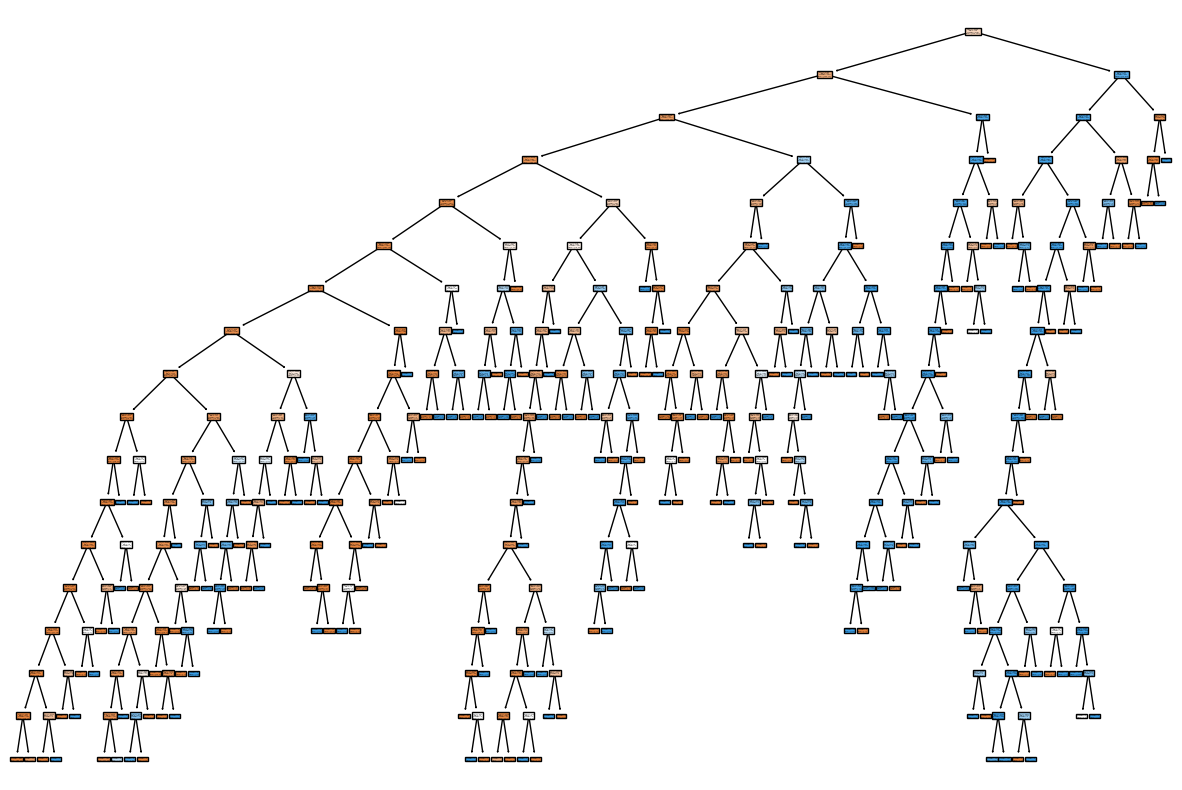

In [110]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [111]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[237,  18],
       [ 15, 151]])

Text(58.222222222222214, 0.5, 'Truth')

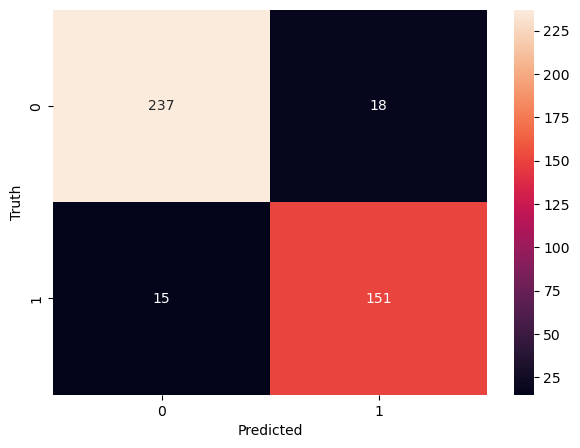

In [112]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [113]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       255
           1       0.89      0.91      0.90       166

    accuracy                           0.92       421
   macro avg       0.92      0.92      0.92       421
weighted avg       0.92      0.92      0.92       421



**Criterion: Gini, Without Max Depth**

In [114]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini')
spam_email_tree

DecisionTreeClassifier(random_state=0)

In [115]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Checking accuracy of testing dataset

In [116]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [117]:
predTree = spam_email_tree.predict(X_test)

In [118]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [119]:
spam_email_tree.score(X_test,y_test)

0.9121140142517815

### Checking accuracy of training dataset

In [120]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9992082343626286

### Visualizing our final decision tree

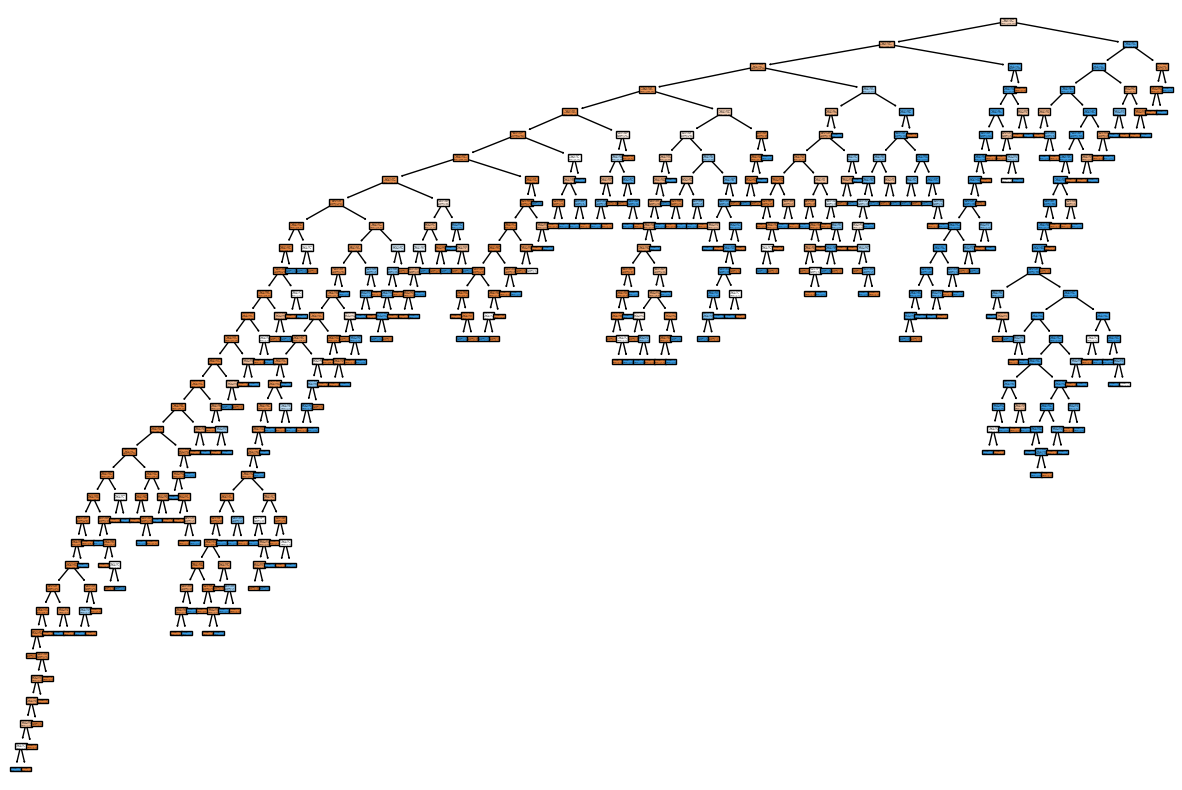

In [121]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [122]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[234,  21],
       [ 16, 150]])

Text(58.222222222222214, 0.5, 'Truth')

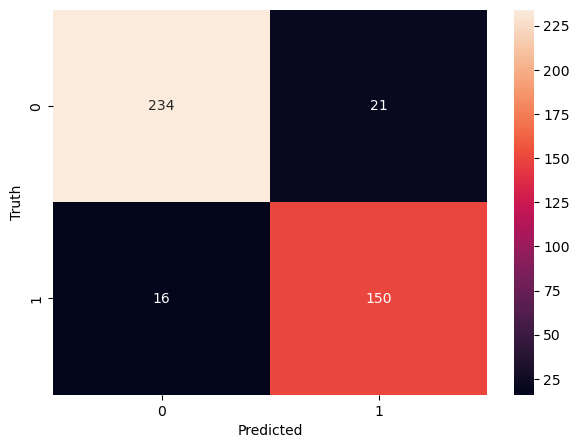

In [123]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [124]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       255
           1       0.88      0.90      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



## PCA data

**Criterion: Entropy, Max Depth: 9**

In [125]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=9)
spam_email_tree

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [126]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

### Checking accuracy of testing dataset

In [127]:
predTree = spam_email_tree.predict(X_test_pca)

In [128]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [129]:
spam_email_tree.score(X_test_pca,y_test)

0.8859857482185273

### Checking accuracy of training dataset

In [130]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9786223277909739

### Visualizing our final decision tree

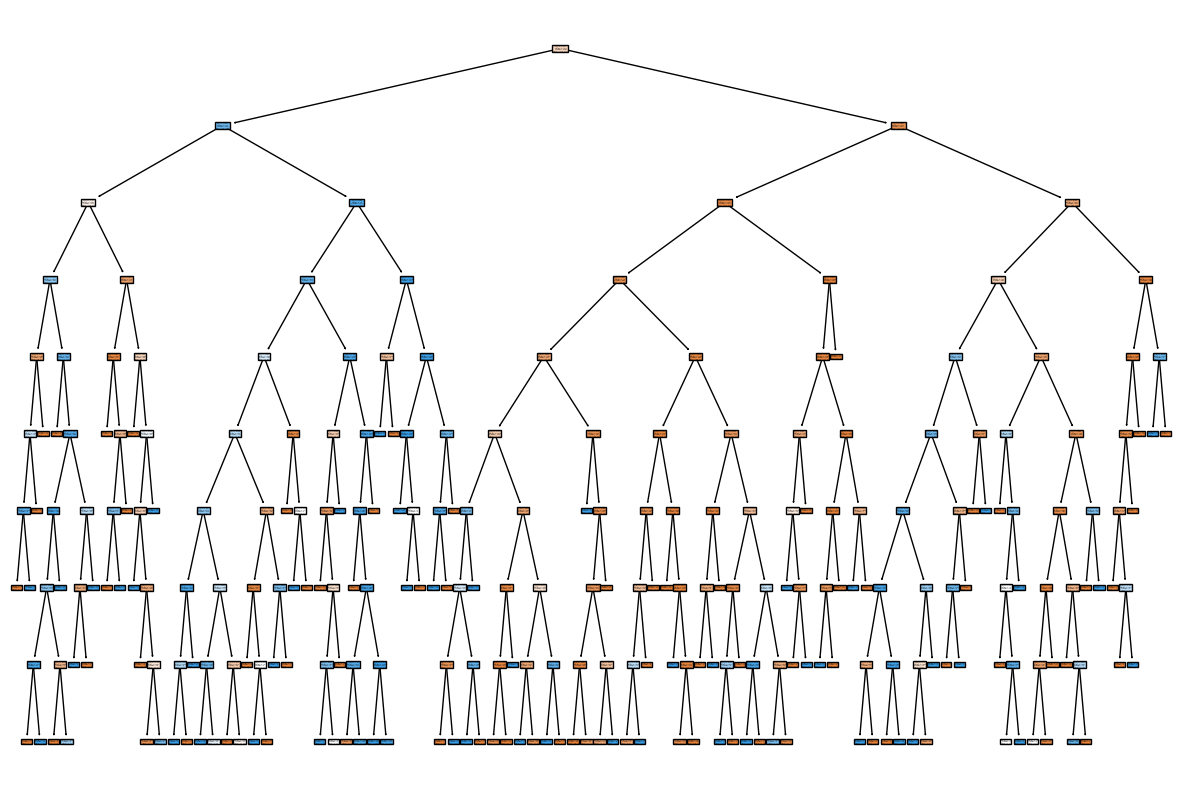

In [131]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [132]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[229,  26],
       [ 22, 144]])

Text(58.222222222222214, 0.5, 'Truth')

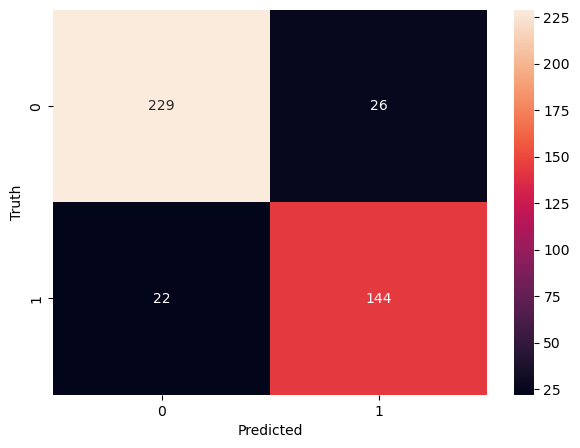

In [133]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [134]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       255
           1       0.85      0.87      0.86       166

    accuracy                           0.89       421
   macro avg       0.88      0.88      0.88       421
weighted avg       0.89      0.89      0.89       421



**Criterion: Entropy, Max Depth: 17**

In [135]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=17)
spam_email_tree

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=0)

In [136]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=0)

### Checking accuracy of testing dataset

In [137]:
predTree = spam_email_tree.predict(X_test_pca)

In [138]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [139]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

### Checking accuracy of training dataset

In [140]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9992082343626286

### Visualizing our final decision tree

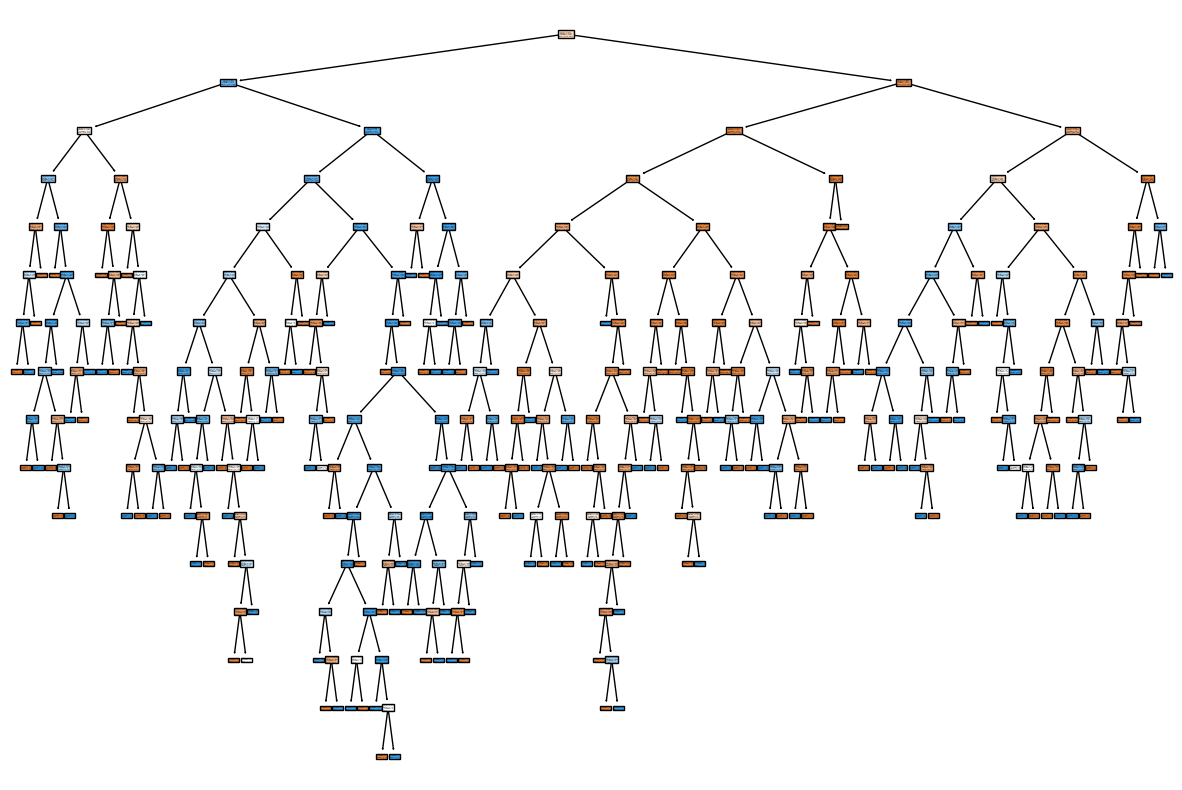

In [141]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [142]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[222,  33],
       [ 19, 147]])

Text(58.222222222222214, 0.5, 'Truth')

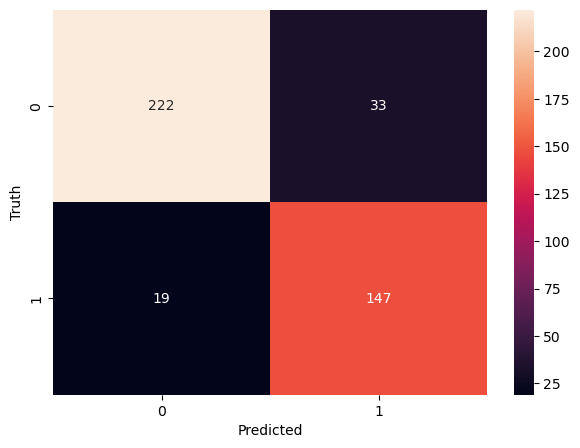

In [143]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [144]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       255
           1       0.82      0.89      0.85       166

    accuracy                           0.88       421
   macro avg       0.87      0.88      0.87       421
weighted avg       0.88      0.88      0.88       421



**Criterion: Entropy, Without Max Depth**

In [145]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='entropy')
spam_email_tree

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [146]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Checking accuracy of testing dataset

In [147]:
predTree = spam_email_tree.predict(X_test_pca)

In [148]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [149]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

### Checking accuracy of training dataset

In [150]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9992082343626286

### Visualizing our final decision tree

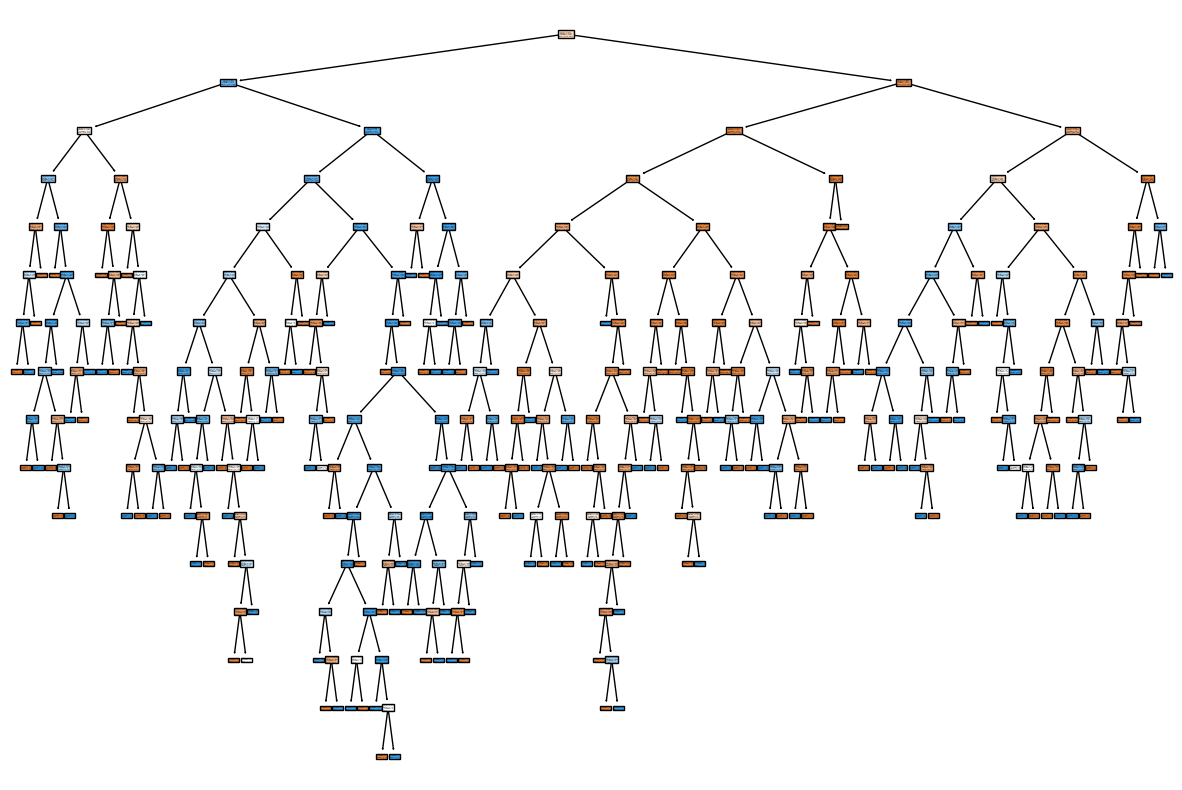

In [151]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [152]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[222,  33],
       [ 19, 147]])

Text(58.222222222222214, 0.5, 'Truth')

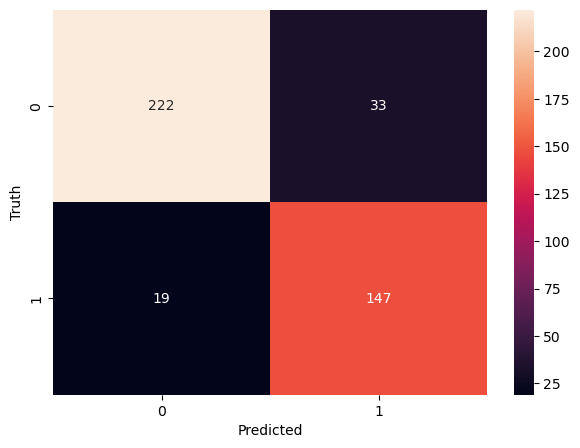

In [153]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [154]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       255
           1       0.82      0.89      0.85       166

    accuracy                           0.88       421
   macro avg       0.87      0.88      0.87       421
weighted avg       0.88      0.88      0.88       421



**Criterion: Gini, Max Depth: 9**

In [155]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=9)
spam_email_tree

DecisionTreeClassifier(max_depth=9, random_state=0)

In [156]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

### Checking accuracy of testing dataset

In [157]:
predTree = spam_email_tree.predict(X_test_pca)

In [158]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [159]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

### Checking accuracy of training dataset

In [160]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9704407495381367

### Visualizing our final decision tree

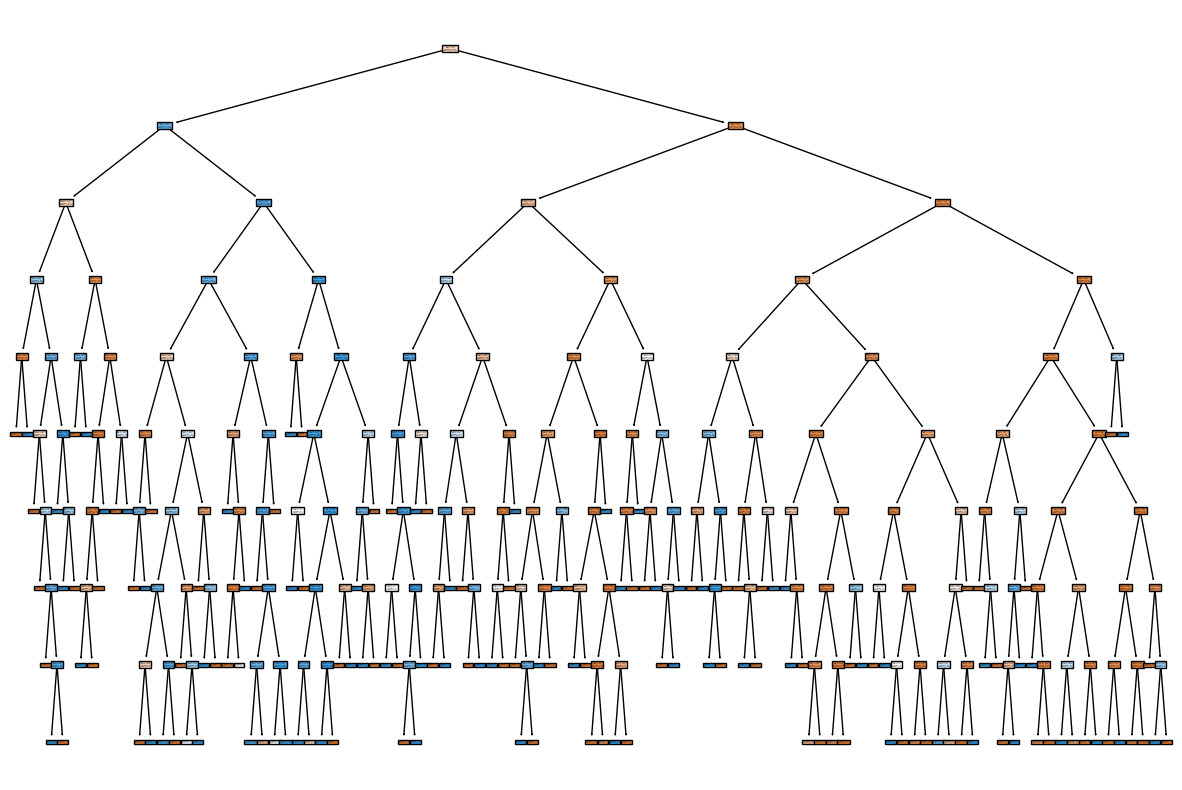

In [161]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [162]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[231,  24],
       [ 28, 138]])

Text(58.222222222222214, 0.5, 'Truth')

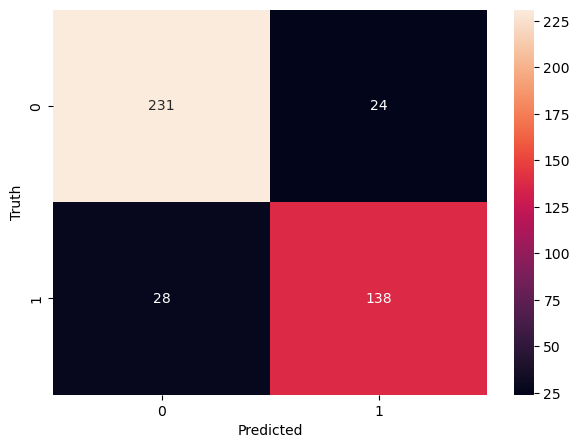

In [163]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [164]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       255
           1       0.85      0.83      0.84       166

    accuracy                           0.88       421
   macro avg       0.87      0.87      0.87       421
weighted avg       0.88      0.88      0.88       421



**Criterion: Gini, Max Depth: 17**

In [165]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=17)
spam_email_tree

DecisionTreeClassifier(max_depth=17, random_state=0)

In [166]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=17, random_state=0)

### Checking accuracy of testing dataset

In [167]:
predTree = spam_email_tree.predict(X_test_pca)

In [168]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [169]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

### Checking accuracy of training dataset

In [170]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9978886249670098

### Visualizing our final decision tree

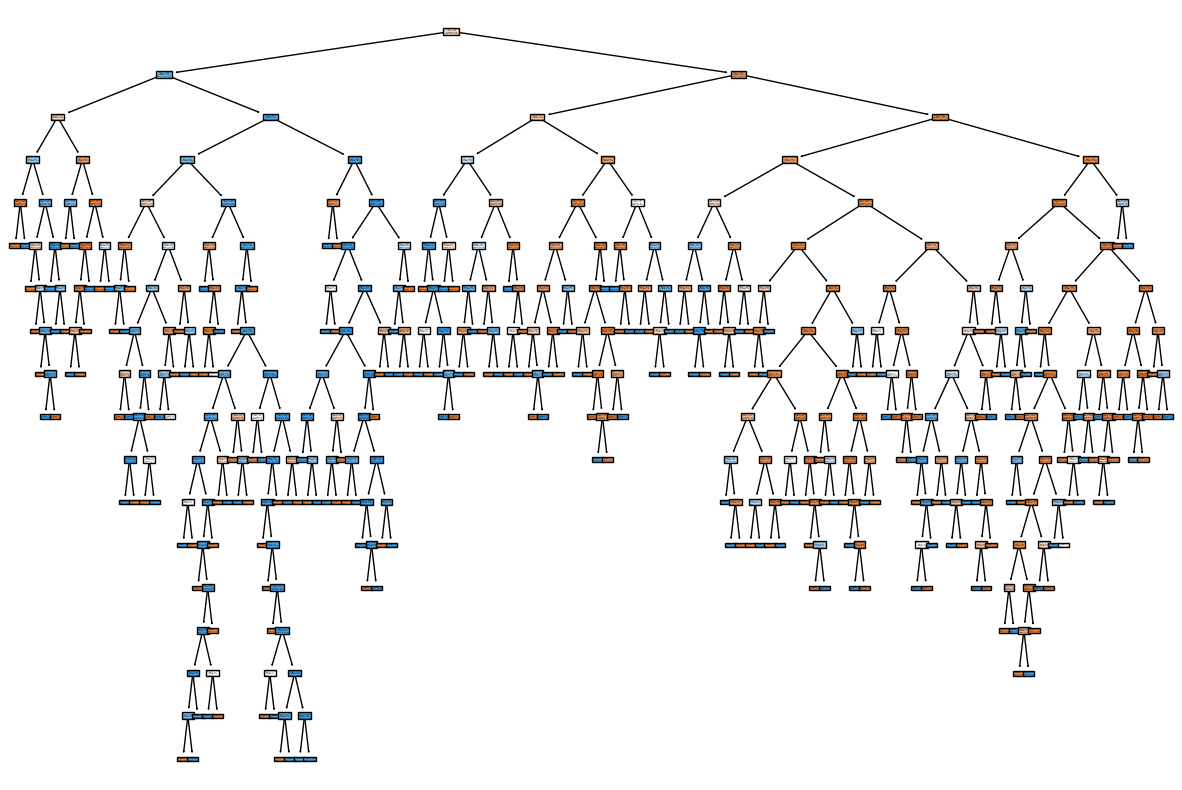

In [171]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [172]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[228,  27],
       [ 25, 141]])

Text(58.222222222222214, 0.5, 'Truth')

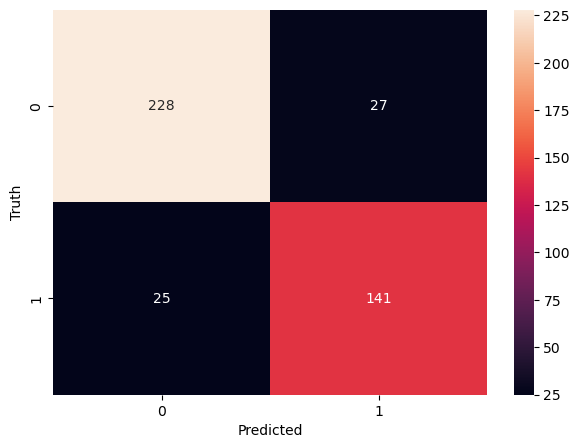

In [173]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [174]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       255
           1       0.84      0.85      0.84       166

    accuracy                           0.88       421
   macro avg       0.87      0.87      0.87       421
weighted avg       0.88      0.88      0.88       421



**Criterion: Gini, Without Max Depth**

In [175]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini')
spam_email_tree

DecisionTreeClassifier(random_state=0)

In [176]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=0)

### Checking accuracy of testing dataset

In [177]:
predTree = spam_email_tree.predict(X_test_pca)

In [178]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [179]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

### Checking accuracy of training dataset

In [180]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9992082343626286

### Visualizing our final decision tree

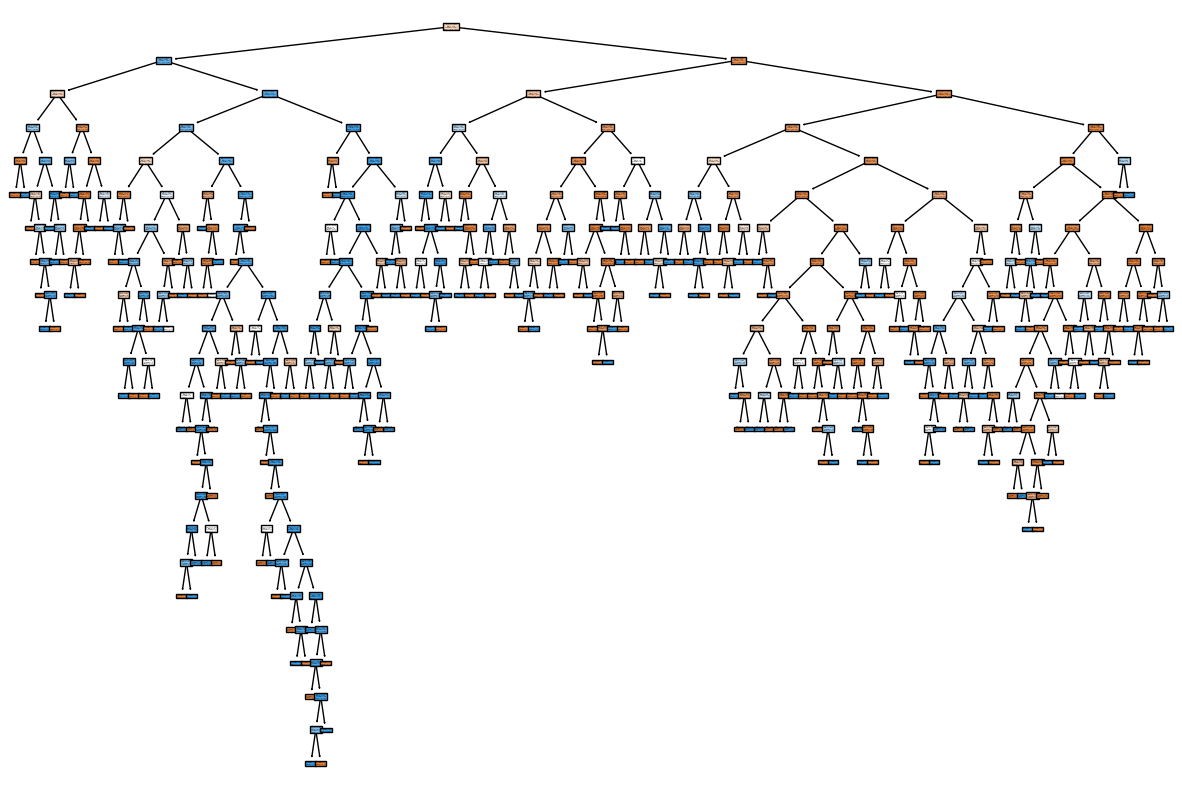

In [181]:
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

### Evaluating our test dataset

**Confusion Matrix**

In [182]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[229,  26],
       [ 26, 140]])

Text(58.222222222222214, 0.5, 'Truth')

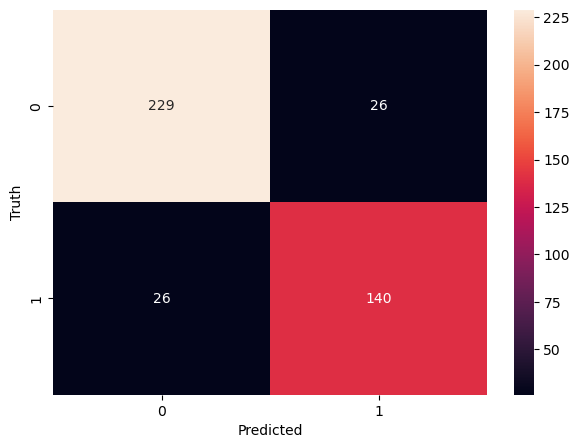

In [183]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [184]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       255
           1       0.84      0.84      0.84       166

    accuracy                           0.88       421
   macro avg       0.87      0.87      0.87       421
weighted avg       0.88      0.88      0.88       421

